<a href="https://colab.research.google.com/github/eunpro/self/blob/main/titanic_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

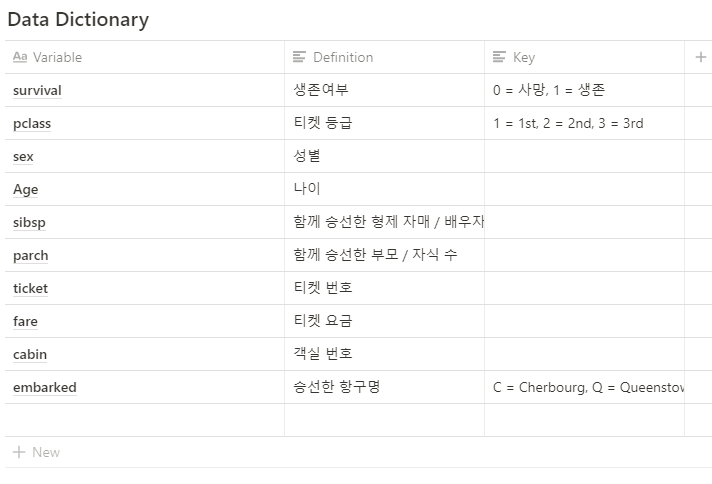

In [94]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X-> model -> y

X: 탑승객 인적사항 정보
y: 생존확률


In [95]:
scaled_data = sns.load_dataset('titanic')

scaled_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [96]:
#숫자인덱싱-> iloc, 컬럼명인덱싱 -> loc
training_data = pd.DataFrame(scaled_data.drop(columns=['survived', 'alive','deck','fare','who','embark_town', 'sibsp', 'parch','embarked'], axis=1))
target = pd.DataFrame(scaled_data['survived'])
print(training_data.head())
print(target.head())
training_data.info()

   pclass     sex   age  class  adult_male  alone
0       3    male  22.0  Third        True  False
1       1  female  38.0  First       False  False
2       3  female  26.0  Third       False   True
3       1  female  35.0  First       False  False
4       3    male  35.0  Third        True   True
   survived
0         0
1         1
2         1
3         1
4         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      891 non-null    int64   
 1   sex         891 non-null    object  
 2   age         714 non-null    float64 
 3   class       891 non-null    category
 4   adult_male  891 non-null    bool    
 5   alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(1), object(1)
memory usage: 23.7+ KB


In [97]:
training_data.isnull().sum()

pclass          0
sex             0
age           177
class           0
adult_male      0
alone           0
dtype: int64

In [98]:
training_data['age'].fillna(training_data['age'].mean(),inplace=True)

In [99]:
training_data.isnull().sum()

pclass        0
sex           0
age           0
class         0
adult_male    0
alone         0
dtype: int64

In [101]:
#class 값을 숫자 카테고리로 바꾸고 타입도 object에서 메모리 적게먹는 int로 바꿈
training_data['class'] = training_data['class'].map( {'First':1, 'Second':2, 'Third':3} ).astype(int)

In [102]:
training_data.head()

,pclass,sex,age,class,adult_male,alone
0,3,male,22.0,3,True,False
1,1,female,38.0,1,False,False
2,3,female,26.0,3,False,True
3,1,female,35.0,1,False,False
4,3,male,35.0,3,True,True


In [103]:
training_data['sex'] = training_data['sex'].map( {'male':1, 'female':0} ).astype(int)

In [104]:
training_data['adult_male'] = training_data['adult_male'].astype(int)
training_data['alone'] = training_data['alone'].astype(int)

In [105]:
training_data.head()

,pclass,sex,age,class,adult_male,alone
0,3,1,22.0,3,1,0
1,1,0,38.0,1,0,0
2,3,0,26.0,3,0,1
3,1,0,35.0,1,0,0
4,3,1,35.0,3,1,1


In [106]:
column_name = ['pclass', 'sex', 'age', 'class', 'adult_male', 'alone']

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #표준정규분포를 따르는 스케일링
scaled_data = scaler.fit_transform(training_data) #처리 과정에서 dataFrame 풀림
scaled_data = pd.DataFrame(scaled_data, columns=column_name) #다시 dataframe 형성
print(scaled_data.head())
# -1 ~ 1 => 70%이상
# -3 ~ 3 => 90%이상

     pclass       sex       age     class  adult_male     alone
0  0.827377  0.737695 -0.592481  0.827377    0.811922 -1.231645
1 -1.566107 -1.355574  0.638789 -1.566107   -1.231645 -1.231645
2  0.827377 -1.355574 -0.284663  0.827377   -1.231645  0.811922
3 -1.566107 -1.355574  0.407926 -1.566107   -1.231645 -1.231645
4  0.827377  0.737695  0.407926  0.827377    0.811922  0.811922


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    scaled_data, target, test_size = 0.30)
#전체 중 30% test용으로 빼고 나머지 70%로 훈련
print('X_train shape :', X_train.shape) #훈련
print('Y_train_shape :', Y_train.shape) #훈련
print('X_test shape :', X_test.shape) #검증
print('Y_test shape :', Y_test.shape) #검증

X_train shape : (623, 6)
Y_train_shape : (623, 1)
X_test shape : (268, 6)
Y_test shape : (268, 1)


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

모델생성

In [113]:
#모델과 관련된 수 : 하이퍼파라미터 
#하이퍼 파라미터를 조금씩 수정해가며 조정
#accuracy=1 나오면 과적합
#Dense지정한 수= 몇 겹인지, dense에 입력한 수: 그 층에 있는 퍼셉트론의 수)
model = Sequential()
#총 13개 input => 출력 512개(퍼셉트론 512개 필요)
model.add(Dense(1024, input_dim=6, activation='relu')) #input_dim은 X_train.shape[1]값
#출력 256개(퍼셉트론 256개 필요)
#model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
#출력 128개(퍼셉트론 128개 필요)
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#출력 1개
model.add(Dense(1, activation='sigmoid')) #마지막은 무조건 sigmoid함수 
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1024)              7168      
_________________________________________________________________
dense_57 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 257       
Total params: 663,553
Trainable params: 663,553
Non-trainable params: 0
_______________________________________________

In [114]:
#50문제씩 잘라서 하는 것이 배치사이즈 #50개 랜덤하게 자름
#batch_size 사용시 빠르게 학습 가능
#epochs=50 50번 학습 => 50개씩 50set생각하면 됨
#validation_split=0.2 20%따로 뽑아 테스트하고, 나머지 학습 => test_dataset학습 X
#epoch가 반복되면 결국 test_dataset도 학습되고 과적합 발생
#batch_size => 데이터 정규분포 -> 결과 좋아짐 / 뜨문뜨문 있음 -> 편향된 결과 나올 수 있음
#               속도 느려짐
#mae: (절대값평균)error를 그냥 더하면 0이되니까 절대값 부여해 평균 계산 
#mse: ㄴ제곱평균: 값이 클수록 loss값 커짐, 에러가 커질수록 mae보다 극대화 됨
#ex) 1 -1 1 -1     4 -4 4 -4 비교
model.compile(loss='mse', optimizer='adam',metrics=['binary_accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=60, epochs=60,validation_split=0.2)

Epoch 1/60
9/9 [==============================] - 1s 37ms/step - loss: 0.1823 - binary_accuracy: 0.7450 - val_loss: 0.1660 - val_binary_accuracy: 0.7440
Epoch 2/60
9/9 [==============================] - 0s 21ms/step - loss: 0.1513 - binary_accuracy: 0.7791 - val_loss: 0.1657 - val_binary_accuracy: 0.7840
Epoch 3/60
9/9 [==============================] - 0s 21ms/step - loss: 0.1455 - binary_accuracy: 0.7851 - val_loss: 0.1597 - val_binary_accuracy: 0.7920
Epoch 4/60
9/9 [==============================] - 0s 19ms/step - loss: 0.1371 - binary_accuracy: 0.8012 - val_loss: 0.1525 - val_binary_accuracy: 0.7920
Epoch 5/60
9/9 [==============================] - 0s 18ms/step - loss: 0.1403 - binary_accuracy: 0.8032 - val_loss: 0.1531 - val_binary_accuracy: 0.8000
Epoch 6/60
9/9 [==============================] - 0s 19ms/step - loss: 0.1327 - binary_accuracy: 0.8032 - val_loss: 0.1573 - val_binary_accuracy: 0.7920
Epoch 7/60
9/9 [==============================] - 0s 20ms/step - loss: 0.1341 - bi

In [115]:
#0주면 진행사항 관련 정보(학습시간, loss값, accuracy 등) 안알려줌
score = model.evaluate(X_test,Y_test, verbose=0) 
print('Keras DNN model loss :', score[0])
print('Keras DNN model accuracy :', score[1])

Keras DNN model loss : 0.12226004898548126
Keras DNN model accuracy : 0.8246268630027771


In [116]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


74.16